# Primeiros passos no SQL

Treinamento de SQL básico para o 2º Data Summit Honda

### *Instalando pacotes/bibliotecas do Python que iremos precisar*

In [1]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=916ddee7d1b4ac4eca442d5b0aa5dfee91aa655e92cb87b61ee3c96198494185
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


### *Importando as bibliotecas*

In [31]:
import pandas as pd
import pandasql as ps
from pandasql import sqldf
from matplotlib.collections import EventCollection
import numpy as np
import matplotlib.pyplot as plt

### *Lendo o CSV*

Uma base que estamos lendo da internet, o repositório é do projeto do Pandas no GitHub e a base é utilizada para exercícios. \
Esta base possiu informações de valores gastos em um restaurante

In [14]:
base = ("https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/tips.csv")

### *Convertendo o CSV em um Data Frame*

In [15]:
tips = pd.read_csv(base)

# 1º Query - Verificar a quantidade total de registros

In [ ]:
query1 = "select count(*) as qtd_linhas from tips"

In [ ]:
sqldf(query1)

# 2º Query - Seleciona os 10 primeiros registros

In [ ]:
query2 = "select * from tips limit 10"

In [ ]:
sqldf(query2)

# 3º Query - Seleciona alguns campos de interesse

In [ ]:
query3 = "select day, time from tips"

In [ ]:
sqldf(query3)

# 4º Query - Seleciona alguns registros de interesse

In [ ]:
query4 = "select * from tips where day = 'Sun'"

In [ ]:
sqldf(query4)

# 5º Query - Identifica o valor da conta de menor valor

In [ ]:
query5 = "select min(total_bill) as menor_valor from tips order by total_bill"

In [ ]:
sqldf(query5)

# 6 Query - Identifica o valor da conta de maior valor

In [ ]:
query6 = "select max(total_bill) as maior_valor  from tips "

In [ ]:
sqldf(query6)

# 7º Query - Seleciona a conta de maior valor - LIMIT ou TOP

In [ ]:
query7 = "select * from tips order by total_bill desc limit 1"

In [ ]:
sqldf(query7)

# 8º Query - Seleciona a conta de maior valor - INNER JOIN

In [ ]:
query8 = "select a.*  from tips as a \
                    inner join \
                        ( \
                        select max(total_bill) as maior_conta from tips \
                        ) b \
                    on a.total_bill = b.maior_conta"

In [ ]:
sqldf(query8)

# 7º Query - Verifica o valor total que foi gasto e a relação entre gorjeta e a conta ordenando pelo maior valor de gorjeta (proporcional)

In [33]:
query7 = "select total_bill, tip, total_bill+tip, tip/total_bill as gorjeta_vs_conta from tips order by gorjeta_vs_conta desc"

In [ ]:
sqldf(query7)

# 8º Query - Calcular a quantidade de contas, somatória do valor da conta e valor médio das contas

In [ ]:
query8 = "select sum(total_bill) as somatorio_valor_total_conta, \
                 count(*) as qtd_contas, \
                 sum(total_bill)/count(*) as valor_media_contas \
          from tips"

In [ ]:
sqldf(query8)

# 9º Query - Calcular a quantidade de contas, somatória do valor da conta e valor médio das contas por sexo

In [ ]:
query9 = "select sex, \
                 sum(total_bill) as somatorio_valor_total_conta, \
                 count(*) as qtd_contas, \
                 sum(total_bill)/count(*) as valor_media_contas \
        from tips  \
        group by sex"

# Execução da 9ª Query em bloco 

In [ ]:
"""query9 = select sex,
                   sum(total_bill) as somatorio_valor_total_conta,
                   count(*) as qtd_contas,
                   sum(total_bill)/count(*) as valor_media_contas 
            from tips 
             group by sex
             """

In [ ]:
sqldf(query9)

# 10º Query - Calcular o valor médio das contas, a proporção da gorjeta por sexo e fumante

In [36]:
query10 = "select sex, smoker,\
                 avg(total_bill) as media_valor_total_conta, \
                 avg(tip/total_bill) as media_proposrcao_gorgeta_conta\
        from tips  \
        group by sex, smoker"

In [37]:
sqldf(query10)

,sex,smoker,media_valor_total_conta,media_proposrcao_gorgeta_conta
0,Female,No,18.105185,0.156921
1,Female,Yes,17.977879,0.182150
2,Male,No,19.791237,0.160669
3,Male,Yes,22.284500,0.152771


# 11º Query - Calcular o valor médio das contas e a proporção da gorjeta por tamanho da mesa

In [ ]:
query11 = "select size,\
                 avg(total_bill) as media_valor_total_conta, \
                 avg(tip/total_bill) as media_proposrcao_gorgeta_conta\
        from tips  \
        group by size"

In [ ]:
sqldf(query11)

# 12º Query - Calcular o tamanho medio da mesa, valor médio da conta e proporção da gorjeta por dia e período

In [38]:
query12 = "select day, time, \
            avg(size) as tamanho_medio_mesa,\
            avg(total_bill) as media_valor_total_conta, \
            avg(tip/total_bill) as media_proposrcao_gorgeta_conta\
        from tips  \
        group by day, time"

In [ ]:
sqldf(query12)

# 13º Query - Comparação do valor da conta com a media do valor para o mesmo tipo de conta

In [42]:
query14 = "select a.*, b.media_valor_total_conta from tips a \
            left join \
                ( \
                select sex, smoker, day, time, size, \
                avg(total_bill) as media_valor_total_conta \
                from tips  \
                group by sex, smoker, day, time, size \
                ) b \
         on  a.sex = b.sex        and \
             a.smoker = b.smoker  and \
             a.day = b.day        and \
             a.time = b.time      and \
             a.size = b.size  "

In [43]:
sqldf(query14)

,total_bill,tip,sex,smoker,day,time,size,media_valor_total_conta
0,16.99,1.01,Female,No,Sun,Dinner,2,14.562000
1,10.34,1.66,Male,No,Sun,Dinner,3,22.291429
2,21.01,3.50,Male,No,Sun,Dinner,3,22.291429
3,23.68,3.31,Male,No,Sun,Dinner,2,15.887727
4,24.59,3.61,Female,No,Sun,Dinner,4,29.915000
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,21.524444
240,27.18,2.00,Female,Yes,Sat,Dinner,2,18.029091
241,22.67,2.00,Male,Yes,Sat,Dinner,2,17.258235
242,17.82,1.75,Male,No,Sat,Dinner,2,14.787059


# 14º Query - Verificando a quantidade e selecionando as contas com valor total da conta menor do que 10

In [ ]:
query16a = "select count(*) from tips where total_bill < 10"

In [ ]:
sqldf(query16a)

In [ ]:
query16b = "select * from tips  where total_bill < 10"

In [ ]:
sqldf(query16b)

# 15º Query - Verificando os tipos de contas que juntas ficaram com valor total menor do que 10

In [ ]:
query17 = "select sex, smoker, day, time, size, \
                count(*) as qtd_contas, \
                sum(total_bill) as total_conta \
            from tips  \
            group by sex, smoker, day, time, size \
            having total_conta < 10"

In [ ]:
sqldf(query17)

# 1ª Plotagem - Faixa de confiança

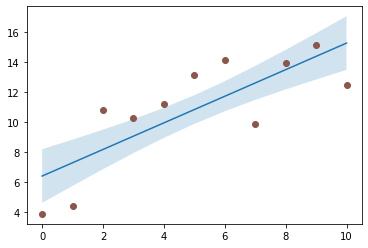

In [10]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# ajustar uma curva linear e estimar seus valores de y e seu erro
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

# 2ª Plotagem - Gráficos de dispersão com uma legenda

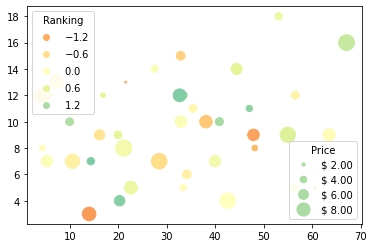

In [12]:
volume = np.random.rayleigh(27, size=40)
amount = np.random.poisson(10, size=40)
ranking = np.random.normal(size=40)
price = np.random.uniform(1, 10, size=40)

fig, ax = plt.subplots()

# Porque o preço é muito pequeno ao ser fornecido como tamanho para ``s``, normalizado para alguns tamanhos de pontos úteis, s=0.3*(price*3)**2
scatter = ax.scatter(volume, amount, c=ranking, s=0.3*(price*3)**2,
                     vmin=-3, vmax=3, cmap="Spectral")

# Produz uma legenda para o ranking (cores). Embora existam 40 diferentes rankings, queremos mostrar apenas 5 deles na legenda.
legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper left", title="Ranking")
ax.add_artist(legend1)

kw = dict(prop="sizes", num=5, color=scatter.cmap(0.7), fmt="$ {x:.2f}",
          func=lambda s: np.sqrt(s/.3)/3)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Price")

plt.show()

# 3ª Plotagem - Gráfico de pizza

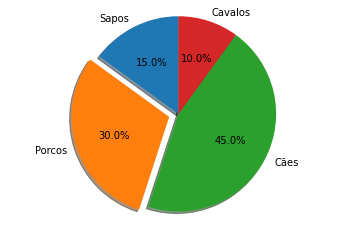

In [46]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
rótulos = 'Sapos', 'Porcos', 'Cães', 'Cavalos'
labels = 'Sapos', 'Porcos', 'Cães', 'Cavalos'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  #Equal aspect ratio garante que a pizza seja desenhada como um círculo.

plt.show()

# Referências

https://www.tutorialspoint.com/sqlite/sqlite_having_clause.htm \
https://www.w3schools.com/sql/default.asp \
https://towardsdatascience.com/anomaly-detection-in-sql-2bcd8648f7a8 \
https://towardsdatascience.com/10-sql-operations-for-80-of-your-data-manipulation-7461c56e25f4 \
https://medium.com/codex/write-your-sql-queries-the-right-way-9c04dfbb6499 \
https://towardsdatascience.com/uber-sql-interview-questions-cf6a2a08a23c 
